In [1]:
import sys, os
sys.path.append('../..')

import numpy as np
import matplotlib.pyplot as plt
from tqdm import *

from simulation.units import *
from simulation.population_sim import LensingObservationWithSubhalos, SubhaloPopulation

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Create simulation, enabling gradient $\nabla_{m_\mathrm{sub}}x_{ij}$ computation

Text(0, 0.5, '$\\theta_y$ [arcsec]')

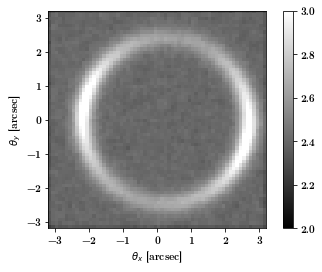

In [2]:
# Generate single lensing sample
lo = LensingObservationWithSubhalos(m_200_min_sub=1e7 * M_s, m_200_max_sub_div_M_hst=0.01,
                                        beta=-1.5, f_sub=0.05,
                                        m_min_calib=1e7 * M_s, m_max_sub_div_M_hst_calib=0.01,
                                        calculate_msub_derivatives=True  # Enable gradient computation
)

v_min = 2.
v_max = 3.

plt.imshow(np.log10(lo.image_poiss_psf),
        vmin=v_min,
        vmax=v_max,
        cmap='gist_gray',
        extent=(-lo.coordinate_limit, lo.coordinate_limit,-lo.coordinate_limit, lo.coordinate_limit),
        origin="lower"
)
plt.colorbar()

plt.xlabel(r"$\theta_x$ [arcsec]")
plt.ylabel(r"$\theta_y$ [arcsec]")

## Checks on gradients

4.703281464674659


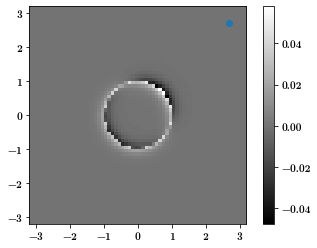

In [11]:
lo.hst_param_dict = {'profile': 'SIE',
                     'theta_x_0': 0.0,
                     'theta_y_0': 0.0,
                     'theta_E': 1.,
                     'q': 1}

lo.theta_x_0 = 0.01
lo.theta_y_0 = 0.01

lo.n_sub_roi = 1

lo.theta_xs = np.array([2.7])
lo.theta_ys = np.array([2.7])
lo.m_subs = np.array([1e6 * M_s])

lo._calculate_derivs()

plt.imshow(lo.m_subs[0] * lo.grad_msub_image[0],
            cmap='gist_gray',
            extent=(-lo.coordinate_limit, lo.coordinate_limit,-lo.coordinate_limit, lo.coordinate_limit),
            origin="lower")
plt.colorbar()
plt.scatter([lo.theta_xs[0]], [lo.theta_ys[0]])

print(np.sum(np.abs(lo.m_subs[0] * lo.grad_msub_image[0])))

In [26]:
# Check that we get same answer with finite differences
m = 1e6 * M_s
dm = 1e-2 * m
deriv = (lo._deriv_helper_function(np.array([m + dm])) - lo._deriv_helper_function(np.array([m - dm]))) / (2 * dm)
np.sum(m * np.abs(deriv))

4.703287253285282

## Plot gradients

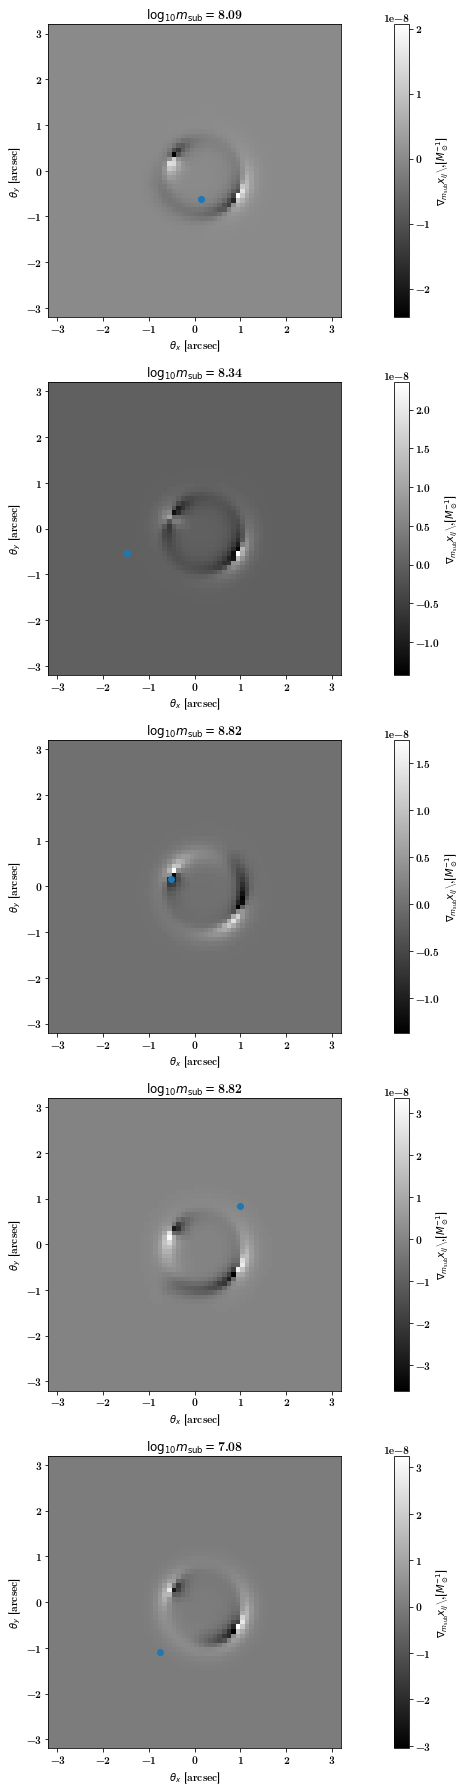

In [521]:
n_mc = lo.n_sub_roi

f, ax = plt.subplots(int(n_mc), figsize=(15, 5 * n_mc))

for i_mc in range(n_mc):
        
    im = ax[i_mc].imshow(lo.grad_msub_image[i_mc] * M_s,
            cmap='gist_gray',
            extent=(-lo.coordinate_limit, lo.coordinate_limit,-lo.coordinate_limit, lo.coordinate_limit),
            origin="lower"
    )

    ax[i_mc].scatter([lo.theta_xs[i_mc]], [lo.theta_ys[i_mc]])
    plt.colorbar(im,ax=ax[i_mc], label=r"$\nabla_{m_\mathrm{sub}}x_{ij}$\,[$M_\odot^{-1}$]")
    
    ax[i_mc].set_title(r"$\log_{10}m_\mathrm{sub} =$" + str(np.log10(lo.m_subs[i_mc] / M_s))[:4])
    ax[i_mc].set_xlabel(r"$\theta_x$ [arcsec]")
    ax[i_mc].set_ylabel(r"$\theta_y$ [arcsec]")

plt.tight_layout()